<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a los datos

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [38]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [39]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [40]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en galones por milla) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo.

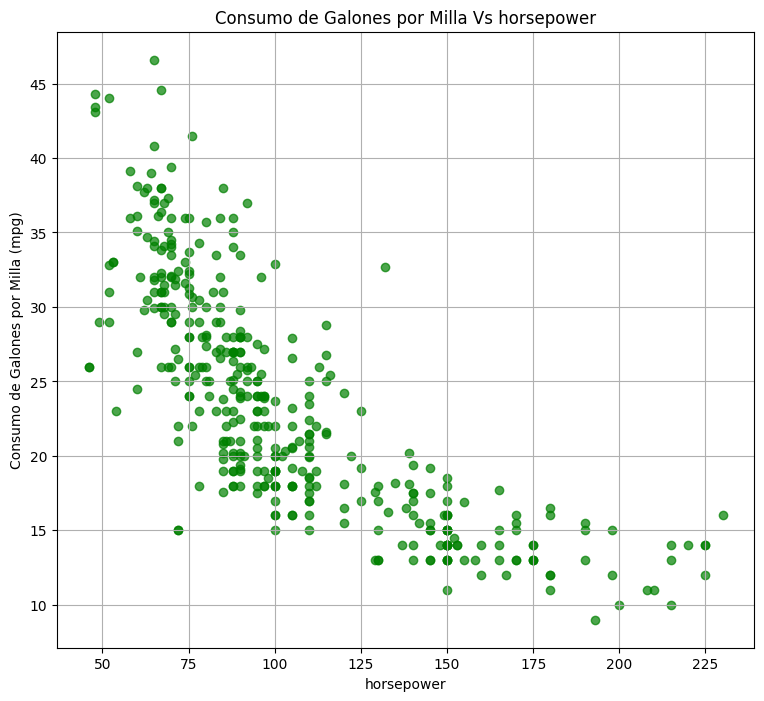

In [41]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # TODO dibuja la gráfica
    plt.figure(figsize=(9, 8))
    plt.scatter(df[nombre_columna], y, alpha=0.7, color="green")
    plt.title(f"Consumo de Galones por Milla Vs {nombre_columna}")
    plt.xlabel(nombre_columna)
    plt.ylabel("Consumo de Galones por Milla (mpg)")
    plt.grid(True)
    plt.show()

visualiza(X, y, 'horsepower')

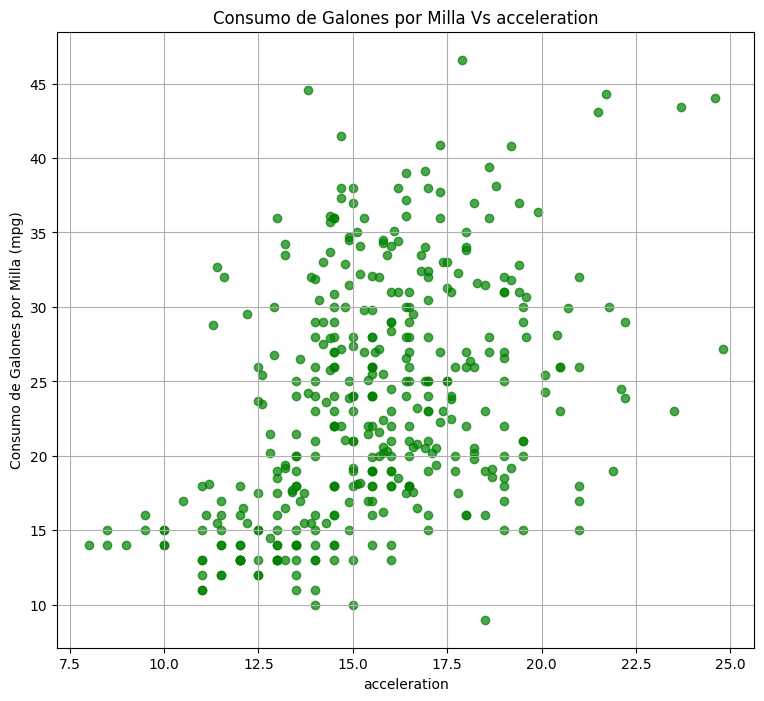

In [42]:
visualiza(X, y, 'acceleration')

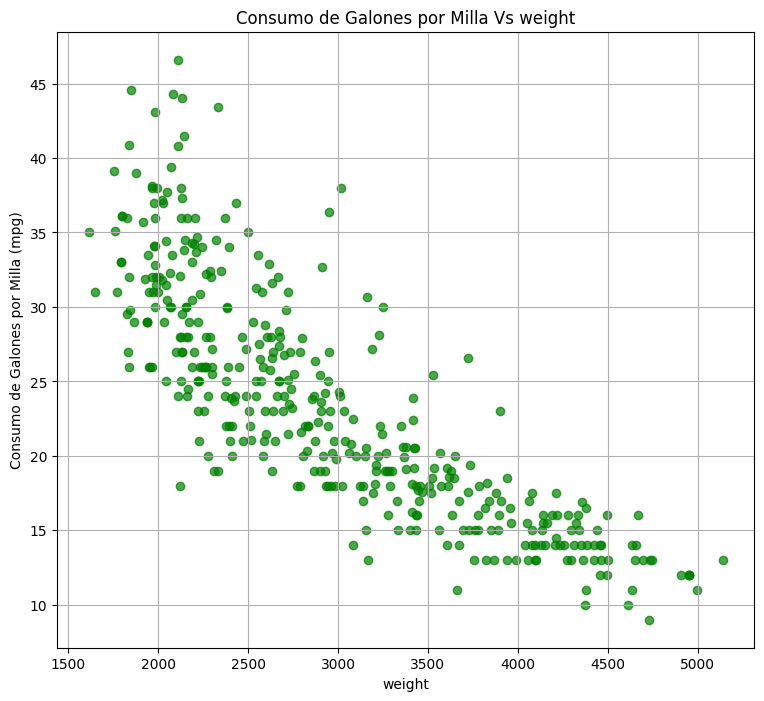

In [43]:
visualiza(X, y, 'weight')

Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [44]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial
    
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    if X.shape[1] > X.shape[0]:
        X = X.T
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # TODO 3 Calcula los pesos
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    return w

In [45]:
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [46]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features[['weight']]
y = auto_mpg.data.targets

# metadata
metadata = auto_mpg.metadata

# variable information
variables = auto_mpg.variables

# Definir la función pesos_ols
def pesos_ols(X, y):
    # Comprueba que las dimensiones son adecuadas y corrige si no es así
    if X.shape[1] > X.shape[0]:
        X = X.T
    
    # Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Agregar una columna de unos para el término independiente
    
    # Calcula los pesos
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    return w

# Convertir los DataFrames de Pandas en arrays de np
X_weight = X.values
y_mpg = y.values

# Calcular los pesos usando la función implementada
w = pesos_ols(X_weight, y_mpg)

# Mostrar los pesos calculados
w


array([[ 4.63173644e+01],
       [-7.67661006e-03]])

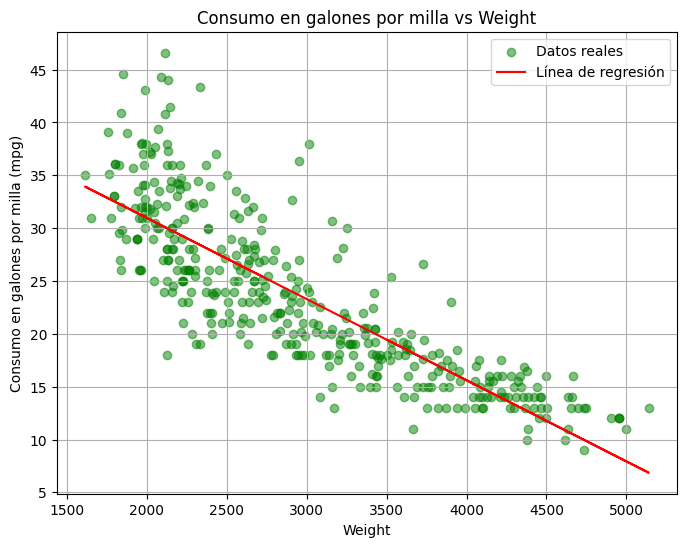

In [47]:
def plot_regression_line(X, y, w):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.5, color='green', label='Datos reales')
    plt.plot(X, w[0] + w[1] * X, color='red', label='Línea de regresión')
    plt.title('Consumo en galones por milla vs Weight')
    plt.xlabel('Weight')
    plt.ylabel('Consumo en galones por milla (mpg)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizar la recta de regresión
plot_regression_line(X_weight, y_mpg, w)


Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [48]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Train con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

LOS RESULTADOS: ambos son similares, tanto los obtenidos manualmente como lo de la sklearn

sklearn
Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]

manual
array([[ 4.63173644e+01],
       [-7.67661006e-03]])

esto indica que la implementacion hecha de la regresion lineal utilizando la formula de minimos cuadrados es correcta y los resultados son similares y consistentes con la libreria sklearn.

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Definir variables necesarias basadas en los DataFrames `X` e `y`
X_weight = X[['weight']].values
y_mpg = y.values.reshape(-1, 1)

# Normalizar datos
X_weight_normalized = (X_weight - np.mean(X_weight)) / np.std(X_weight)

# Definir la función pesos_ols
def pesos_ols(X, y):
    if X.shape[1] > X.shape[0]:
        X = X.T
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Ajustar el descenso del gradiente con una tasa de aprendizaje menor y datos normalizados
def gradient_descent(X, y, learning_rate=0.001, n_iterations=20000):
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    w = np.random.randn(X_b.shape[1], 1)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(w) - y)
        w = w - learning_rate * gradients
    return w

# Calcular los pesos usando el método de mínimos cuadrados
w_ols = pesos_ols(X_weight, y_mpg)

# Calcular los pesos usando el descenso del gradiente con datos normalizados
w_gd = gradient_descent(X_weight_normalized, y_mpg)

# Crear el objeto de regresión lineal de scikit-learn
lr = LinearRegression()
lr.fit(X_weight, y_mpg)
intercept = lr.intercept_[0]
coef = lr.coef_[0][0]

print("Pesos calculados (Mínimos Cuadrados):", w_ols.ravel())
print("Pesos calculados (Descenso del Gradiente):", w_gd.ravel())
print("Pesos calculados (scikit-learn): Intercepto =", intercept, ", Coeficiente =", coef)

Pesos calculados (Mínimos Cuadrados): [ 4.63173644e+01 -7.67661006e-03]
Pesos calculados (Descenso del Gradiente): [23.51457286 -6.49270202]
Pesos calculados (scikit-learn): Intercepto = 46.31736442026563 , Coeficiente = -0.007676610063926467


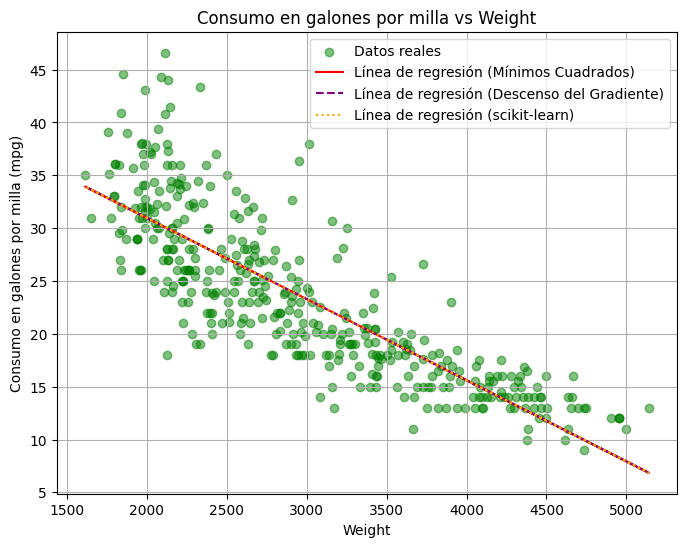

In [50]:
# Función para visualizar las rectas de regresión
def plot_regression_line(X, X_normalized, y, w_ols, w_gd, intercept, coef):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.5, color='green', label='Datos reales')
    plt.plot(X, w_ols[0] + w_ols[1] * X, color='red', label='Línea de regresión (Mínimos Cuadrados)')
    plt.plot(X, w_gd[0] + w_gd[1] * X_normalized, color='purple', linestyle='dashed', label='Línea de regresión (Descenso del Gradiente)')
    plt.plot(X, intercept + coef * X, color='orange', linestyle='dotted', label='Línea de regresión (scikit-learn)')
    plt.title('Consumo en galones por milla vs Weight')
    plt.xlabel('Weight')
    plt.ylabel('Consumo en galones por milla (mpg)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizar las rectas de regresión
plot_regression_line(X_weight, X_weight_normalized, y_mpg, w_ols, w_gd, intercept, coef)

In [51]:
COMPARACIONES:

Con la formula de minimos cuadrados se dan numeros exactos y directos.
Con el desceso del gradiente hay que hacer varias iteraciones y regularizar datos para evitar nam que se producian. 
Es mas inestable por que los resultados van cambiandon segun las iteraciones y si se va ajustandoa la tasa de aprendizaje.

Los coeficientes obtenidos son:

Mínimos Cuadrados:w=[46.3173644,−0.00767661]
Descenso del Gradiente: (Dependiendo de los valores obtenidos después del ajuste)
Scikit-learn: Intercepto = 46.31736442026563, Coeficiente = -0.007676610063926467

SyntaxError: invalid character '−' (U+2212) (1184523163.py, line 9)

## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [ ]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s
    
    
    # TODO 2 Haz un bucle para las iteraciones 
    # TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas
    
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

In [ ]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Agregar una columna de unos para el término independiente
    
    # TODO 2 Haz un bucle para las iteraciones 
    for i in range(n_iter):
        # Calcular las predicciones
        y_pred = X_b.dot(w)
        
        # Calcular el error
        error = y_pred - y
        
        # Calcular el gradiente
        gradients = 2 / X.shape[0] * X_b.T.dot(error)
        
        # Actualizar los pesos
        w = w - eta * gradients
        
        # Calcular la pérdida (error cuadrático medio)
        loss = (error**2).mean()
        
        # Añadir los pesos y la pérdida a las listas
        w_iter.append(w)
        loss_iter.append(loss)
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)

# Parámetros del descenso del gradiente
eta = 0.01 
iteraciones = 2000 

# Inicializar pesos aleatoriamente
np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

# Definir los datos
y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

# Ejecutar el descenso del gradiente
weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

# Mostrar los pesos finales
print(weights[-1])


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

In [ ]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt

# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 

# data (as pandas dataframes)
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

# Escalamos la variable X
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy().reshape((y.shape[0], 1))

X_gd = (X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate
eta = 0.01 
iteraciones = 2000 

# Inicializar pesos aleatoriamente
np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

# TODO 2 Aplicamos el algoritmo
def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # Añadir la columna de 1s
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Agregar una columna de unos para el término independiente
    
    # Bucle para las iteraciones 
    for i in range(n_iter):
        # Calcular las predicciones
        y_pred = X_b.dot(w)
        
        # Calcular el error
        error = y_pred - y
        
        # Calcular el gradiente
        gradients = 2 / X.shape[0] * X_b.T.dot(error)
        
        # Actualizar los pesos
        w = w - eta * gradients
        
        # Calcular la pérdida (error cuadrático medio)
        loss = (error**2).mean()
        
        # Añadir los pesos y la pérdida a las listas
        w_iter.append(w)
        loss_iter.append(loss)
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)

# Aplicar el algoritmo
weights, loss = gradient_descent(X_gd, y_gd, w0, iteraciones, eta)

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) - 1


In [ ]:
# TODO 3 Dibuja la gráfica
plt.figure(figsize=(8, 6))
plt.scatter(X_gd, y_gd, alpha=0.5, color='green', label='Datos reales')
plt.plot(X_gd, weights[-1][0] + weights[-1][1] * X_gd, color='red', label='Línea de regresión (Descenso del Gradiente)')
plt.xlabel('Weight (escalado)')
plt.ylabel('Consumo en Galones por Milla (mpg)')
plt.title('Consumo en Galones por Milla Vs Weight (escalado)')
plt.legend()
plt.grid(True)
plt.xlim(x_min, x_max)
plt.show()